In [94]:
import numpy as np
from skimage import io,filters,morphology,color
import os
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
green = [66,142,100]
pink = [188,128,167]
orange = [183,174,50]
alpha = 0.7

green = [g/255 for g in green]
pink = [p/255 for p in pink]
orange = [o/255 for o in orange]

In [96]:
thunder_warp_path_list =    ['/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle8_ROI1/warp_thunder_S003_z33_to_hmEM.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle17_ROI1/warp_thunder_S001_z73_to_hmEM.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/warp_thunder_s001_z77_to_hmEM.tif']
ridges_path_list =          ['/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle8_ROI1/hmEM_ridges.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle17_ROI1/hmEM_ridges.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/hmEM_ridges.tif']
mask_path_list =            ['/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle8_ROI1/hmEM_mask.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle17_ROI1/hmEM_mask.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/hmEM_mask.tif']
otsu_path_list =            ['/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle8_ROI1/hmEM_otsu.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle17_ROI1/hmEM_otsu.tif',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/hmEM_otsu.tif']
out_path_list =             ['/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle8_ROI1',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block1/cycle17_ROI1',
                             '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2']

In [97]:
sigma = 10

df = pd.DataFrame(index=range(len(thunder_warp_path_list)),columns=['asyn-ridge-content','ctt-ridge-content','asyn-dense-content','ctt-dense-content'])
count = 0
for t_path,r_path,otsu_path,m_path,out_path in zip(thunder_warp_path_list,ridges_path_list,otsu_path_list,mask_path_list,out_path_list):
    ridges = io.imread(r_path)==255
    mask = io.imread(m_path)==255
    otsu = io.imread(otsu_path)==255
    thunder_warp = io.imread(t_path)

    asyn = filters.gaussian(thunder_warp[0,:,:],sigma=sigma)
    ctt = filters.gaussian(thunder_warp[3,:,:],sigma=sigma)
    ctt_thres = (ctt > filters.threshold_otsu(ctt))
    asyn_thres = (asyn > filters.threshold_otsu(asyn))

    ctt_thres = mask * morphology.remove_small_objects(ctt_thres,min_size=500000)
    asyn_thres = mask * morphology.remove_small_objects(asyn_thres,min_size=500000)

    df.loc[count,'asyn-ridge-content'] = 100*(asyn_thres*ridges ).sum() / asyn_thres.sum()
    df.loc[count,'ctt-ridge-content'] = 100*(ctt_thres*ridges).sum() / ctt_thres.sum()
    df.loc[count,'asyn-dense-content'] = 100*(asyn_thres*otsu ).sum() / asyn_thres.sum()
    df.loc[count,'ctt-dense-content'] = 100*(ctt_thres*otsu).sum() / ctt_thres.sum()

    count += 1


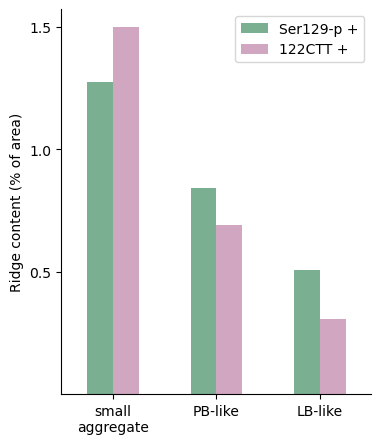

In [98]:
fig,ax = plt.subplots(figsize=(4,5))
df[['asyn-ridge-content','ctt-ridge-content']].plot.bar(color=[green+[alpha],pink+[alpha]],ax=ax)
ax.legend(['Ser129-p +','122CTT +'])
ax.set_ylabel('Ridge content (% of area)')
ax.set_yticks([0.5,1,1.5])
ax.set_xticks([0,1,2],labels=['small\naggregate','PB-like','LB-like'],rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


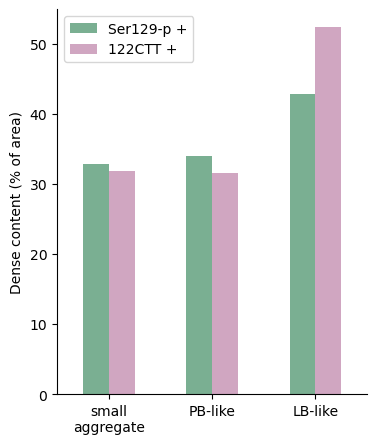

In [99]:
fig,ax = plt.subplots(figsize=(4,5))
df[['asyn-dense-content','ctt-dense-content']].plot.bar(color=[green+[alpha],pink+[alpha]],ax=ax)
ax.legend(['Ser129-p +','122CTT +'])
ax.set_ylabel('Dense content (% of area)')
#ax.set_yticks([0.5,1,1.5])
ax.set_xticks([0,1,2],labels=['small\naggregate','PB-like','LB-like'],rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

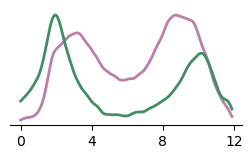

In [83]:
# Plot profile
path_ctt = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/profile-ctt.csv'
path_pser = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A04/block1/cycle5_ROI2/profile-pser.csv'
ctt_profile = pd.read_csv(path_ctt)
pser_profile = pd.read_csv(path_pser)

ctt_profile['Distance_(um)'] = ctt_profile['Distance_(inches)']*0.0254*1e6
#ctt_profile['Distance_(um)'] = ctt_profile['Distance_(um)'].max() - ctt_profile['Distance_(um)']
ctt_profile['RFU'] = ctt_profile['Gray_Value'] / ctt_profile['Gray_Value'].max()
pser_profile['Distance_(um)'] = pser_profile['Distance_(inches)']*0.0254*1e6
#pser_profile['Distance_(um)'] = pser_profile['Distance_(um)'].max() - pser_profile['Distance_(um)']
pser_profile['RFU'] = pser_profile['Gray_Value'] / pser_profile['Gray_Value'].max()

fig,ax = plt.subplots(figsize=(3,1.5))
ctt_profile.plot(x='Distance_(um)',y='RFU',color=pink,ax=ax,linewidth=2)
pser_profile.plot(x='Distance_(um)',y='RFU',color=green,ax=ax,linewidth=2)
ax.get_legend().remove()
ax.set_yticks([])
ax.set_xlabel('')
ax.set_xticks(range(0,16,4))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [100]:
# Visualization
num_dilations = 5
black = [0.4,0.4,0.4]

for t_path,r_path,m_path,out_path in zip(thunder_warp_path_list,ridges_path_list,mask_path_list,out_path_list):
    ridges = io.imread(r_path)==255
    mask = io.imread(m_path)==255
    thunder_warp = io.imread(t_path)
    
    asyn = filters.gaussian(thunder_warp[0,:,:],sigma=sigma)
    ctt = filters.gaussian(thunder_warp[3,:,:],sigma=sigma)
    ctt_thres = (ctt > filters.threshold_otsu(ctt))
    asyn_thres = (asyn > filters.threshold_otsu(asyn))

    ctt_thres = mask * morphology.remove_small_objects(ctt_thres,min_size=500000)
    asyn_thres = mask * morphology.remove_small_objects(asyn_thres,min_size=500000)

    ridges_dilate = ridges.copy()
    for i in range(num_dilations):
        ridges_dilate = morphology.dilation(ridges_dilate)

    width,height = ctt.shape
    out = np.zeros((width,height,4))
    out[:,:,3] = 1

    out[asyn_thres,:] = green+[alpha]
    out[asyn_thres*ridges_dilate,:] = black+[1]

    out[ctt_thres,:] = pink+[alpha]
    out[ctt_thres*ridges_dilate,:] = black+[1]

    out[asyn_thres*ctt_thres,:] = orange+[alpha]
    out[asyn_thres*ctt_thres*ridges_dilate,:] = black+[1]

    rgb = color.rgba2rgb(out)
    io.imsave(os.path.join(out_path,'ctt_versus_asyn.png'),rgb)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


<Axes: xlabel='Distance_(um)'>

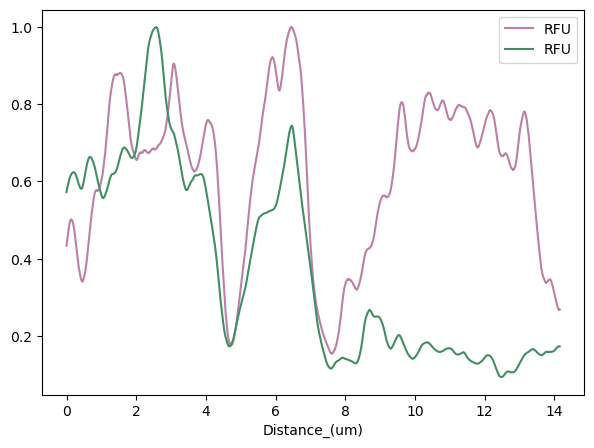